In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline
import matplotlib.cm as cm
import pandas as pd

In [36]:
dataset = pd.read_csv('xy.csv')
x = dataset['x']
y = dataset['y']

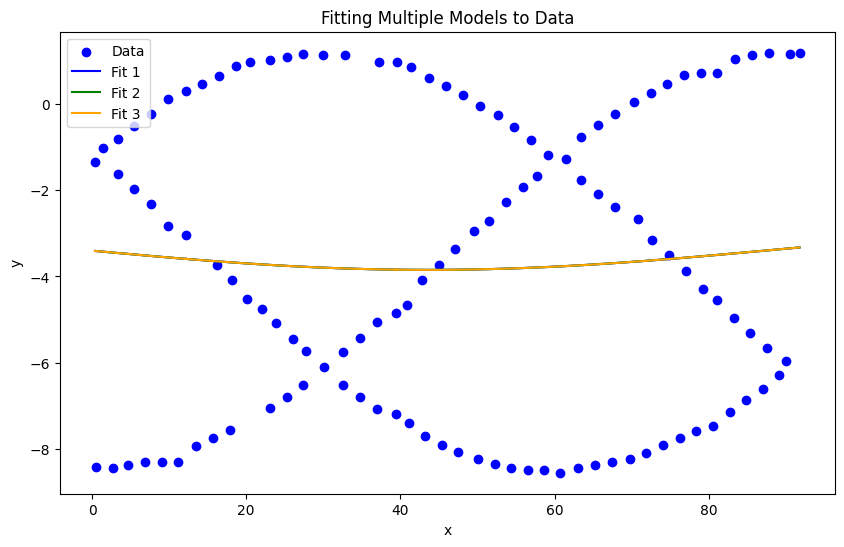

In [37]:
# モデル関数の定義
def model1(x, Kxx, Kyy, Kxy):
    C = np.cos(np.radians(x))
    S = np.sin(np.radians(x))
    return C*(C*Kxx + S*Kxy) + S*(C*Kxy + S*Kyy)

def model2(x, Kxx, Kyy, Kxy):
    C = np.cos(np.radians(x))
    S = np.sin(np.radians(x))
    return C*(-0.5*Kxx*(-0.5*C - 0.866025403784439*S) - 0.5*Kxy*(-0.866025403784439*C - 0.5*S) - 0.866025403784439*Kxy*(-0.5*C - 0.866025403784439*S) - 0.866025403784439*Kyy*(-0.866025403784439*C - 0.5*S)) + S*(-0.866025403784439*Kxx*(-0.5*C - 0.866025403784439*S) - 0.866025403784439*Kxy*(-0.866025403784439*C - 0.5*S) - 0.5*Kxy*(-0.5*C - 0.866025403784439*S) - 0.5*Kyy*(-0.866025403784439*C - 0.5*S))

def model3(x, Kxx, Kyy, Kxy):
    C = np.cos(np.radians(x))
    S = np.sin(np.radians(x))
    return C*(-0.5*Kxx*(-0.5*C + 0.866025403784439*S) + 0.866025403784439*Kxy*(-0.5*C + 0.866025403784439*S) - 0.5*Kxy*(0.866025403784439*C - 0.5*S) + 0.866025403784439*Kyy*(0.866025403784439*C - 0.5*S)) + S*(0.866025403784439*Kxx*(-0.5*C + 0.866025403784439*S) - 0.5*Kxy*(-0.5*C + 0.866025403784439*S) + 0.866025403784439*Kxy*(0.866025403784439*C - 0.5*S) - 0.5*Kyy*(0.866025403784439*C - 0.5*S))

# 初期推定値の設定
initial_guess1 = [1,1,1]      # model1 の初期値
initial_guess2 = [1,1,1]      # model2 の初期値
initial_guess3 = [1,1,1]   # model3 の初期値

# データにフィット
popt1, pcov1 = curve_fit(model1, x, y, p0=initial_guess1)
popt2, pcov2 = curve_fit(model2, x, y, p0=initial_guess2)
popt3, pcov3 = curve_fit(model3, x, y, p0=initial_guess3)

# フィッティング結果のプロット
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data', color='blue')

# フィッティング曲線のプロット
plt.plot(x, model1(x, *popt1), label=f'Fit 1', color='blue')
plt.plot(x, model2(x, *popt2), label=f'Fit 2', color='green')
plt.plot(x, model3(x, *popt3), label=f'Fit 3', color='orange')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Fitting Multiple Models to Data')
plt.show()

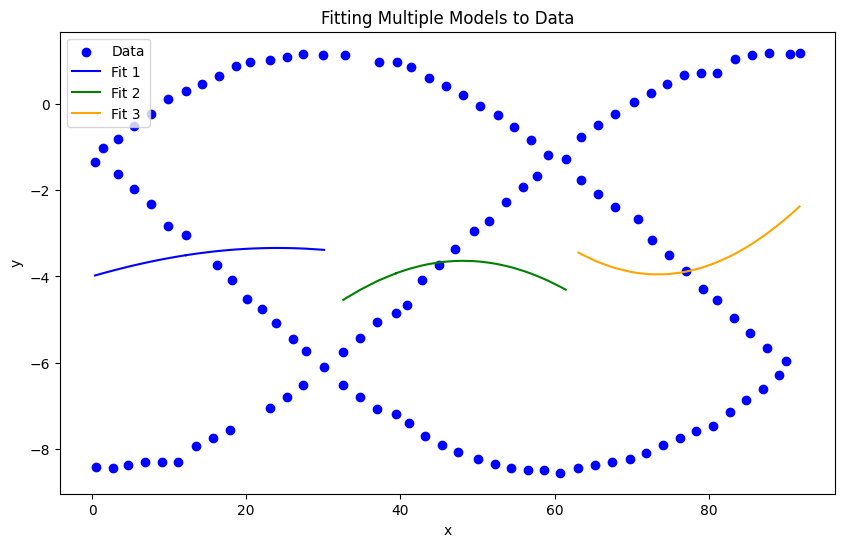

In [38]:
# モデル関数の定義
def model1(x, Kxx, Kyy, Kxy):
    C = np.cos(np.radians(x))
    S = np.sin(np.radians(x))
    return C*(C*Kxx + S*Kxy) + S*(C*Kxy + S*Kyy)

def model2(x, Kxx, Kyy, Kxy):
    C = np.cos(np.radians(x))
    S = np.sin(np.radians(x))
    return C*(-0.5*Kxx*(-0.5*C - 0.866025403784439*S) - 0.5*Kxy*(-0.866025403784439*C - 0.5*S) - 0.866025403784439*Kxy*(-0.5*C - 0.866025403784439*S) - 0.866025403784439*Kyy*(-0.866025403784439*C - 0.5*S)) + S*(-0.866025403784439*Kxx*(-0.5*C - 0.866025403784439*S) - 0.866025403784439*Kxy*(-0.866025403784439*C - 0.5*S) - 0.5*Kxy*(-0.5*C - 0.866025403784439*S) - 0.5*Kyy*(-0.866025403784439*C - 0.5*S))

def model3(x, Kxx, Kyy, Kxy):
    C = np.cos(np.radians(x))
    S = np.sin(np.radians(x))
    return C*(-0.5*Kxx*(-0.5*C + 0.866025403784439*S) + 0.866025403784439*Kxy*(-0.5*C + 0.866025403784439*S) - 0.5*Kxy*(0.866025403784439*C - 0.5*S) + 0.866025403784439*Kyy*(0.866025403784439*C - 0.5*S)) + S*(0.866025403784439*Kxx*(-0.5*C + 0.866025403784439*S) - 0.5*Kxy*(-0.5*C + 0.866025403784439*S) + 0.866025403784439*Kxy*(0.866025403784439*C - 0.5*S) - 0.5*Kyy*(0.866025403784439*C - 0.5*S))

# 初期推定値の設定
initial_guess1 = [1,1,1]  # model1 の初期値
initial_guess2 = [1,1,1]  # model2 の初期値
initial_guess3 = [1,1,1]  # model3 の初期値

# データの分割 (仮に3つの範囲に分けると仮定)
# これにより各モデルが異なるデータセットに適用されるようにする
x1, y1 = x[:len(x)//3], y[:len(y)//3]
x2, y2 = x[len(x)//3:2*len(x)//3], y[len(y)//3:2*len(y)//3]
x3, y3 = x[2*len(x)//3:], y[2*len(y)//3:]

# データにフィット
popt1, pcov1 = curve_fit(model1, x1, y1, p0=initial_guess1)
popt2, pcov2 = curve_fit(model2, x2, y2, p0=initial_guess2)
popt3, pcov3 = curve_fit(model3, x3, y3, p0=initial_guess3)

# フィッティング結果のプロット
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data', color='blue')

# フィッティング曲線のプロット
plt.plot(x1, model1(x1, *popt1), label='Fit 1', color='blue')
plt.plot(x2, model2(x2, *popt2), label='Fit 2', color='green')
plt.plot(x3, model3(x3, *popt3), label='Fit 3', color='orange')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Fitting Multiple Models to Data')
plt.show()

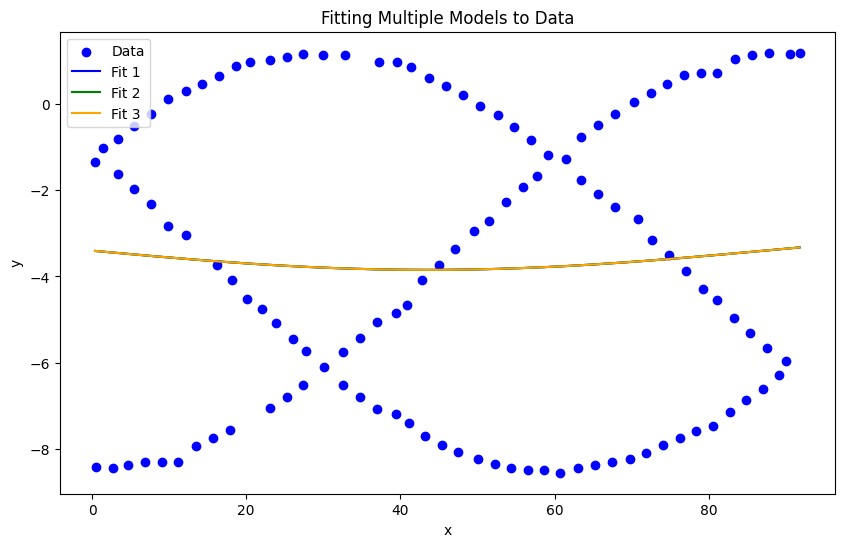

In [39]:
# モデル関数の定義
def model1(x, Kxx, Kyy, Kxy):
    C = np.cos(np.radians(x))
    S = np.sin(np.radians(x))
    return C * (C * Kxx + S * Kxy) + S * (C * Kxy + S * Kyy)

def model2(x, Kxx, Kyy, Kxy):
    C = np.cos(np.radians(x))
    S = np.sin(np.radians(x))
    return C * (-0.5 * Kxx * (-0.5 * C - 0.866025403784439 * S) - 0.5 * Kxy * (-0.866025403784439 * C - 0.5 * S) - 0.866025403784439 * Kxy * (-0.5 * C - 0.866025403784439 * S) - 0.866025403784439 * Kyy * (-0.866025403784439 * C - 0.5 * S)) + S * (-0.866025403784439 * Kxx * (-0.5 * C - 0.866025403784439 * S) - 0.866025403784439 * Kxy * (-0.866025403784439 * C - 0.5 * S) - 0.5 * Kxy * (-0.5 * C - 0.866025403784439 * S) - 0.5 * Kyy * (-0.866025403784439 * C - 0.5 * S))

def model3(x, Kxx, Kyy, Kxy):
    C = np.cos(np.radians(x))
    S = np.sin(np.radians(x))
    return C * (-0.5 * Kxx * (-0.5 * C + 0.866025403784439 * S) + 0.866025403784439 * Kxy * (-0.5 * C + 0.866025403784439 * S) - 0.5 * Kxy * (0.866025403784439 * C - 0.5 * S) + 0.866025403784439 * Kyy * (0.866025403784439 * C - 0.5 * S)) + S * (0.866025403784439 * Kxx * (-0.5 * C + 0.866025403784439 * S) - 0.5 * Kxy * (-0.5 * C + 0.866025403784439 * S) + 0.866025403784439 * Kxy * (0.866025403784439 * C - 0.5 * S) - 0.5 * Kyy * (0.866025403784439 * C - 0.5 * S))

# 初期推定値の設定
initial_guess1 = [1, 1, 1]  # model1 の初期値
initial_guess2 = [1, 1, 1]  # model2 の初期値
initial_guess3 = [1, 1, 1]  # model3 の初期値

# データにフィット
popt1, pcov1 = curve_fit(model1, x, y, p0=initial_guess1)
popt2, pcov2 = curve_fit(model2, x, y, p0=initial_guess2)
popt3, pcov3 = curve_fit(model3, x, y, p0=initial_guess3)

# フィッティング結果のプロット
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data', color='blue')

# フィッティング曲線のプロット
x_fit = np.linspace(min(x), max(x), 1000)
plt.plot(x_fit, model1(x_fit, *popt1), label=f'Fit 1', color='blue')
plt.plot(x_fit, model2(x_fit, *popt2), label=f'Fit 2', color='green')
plt.plot(x_fit, model3(x_fit, *popt3), label=f'Fit 3', color='orange')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Fitting Multiple Models to Data')
plt.show()

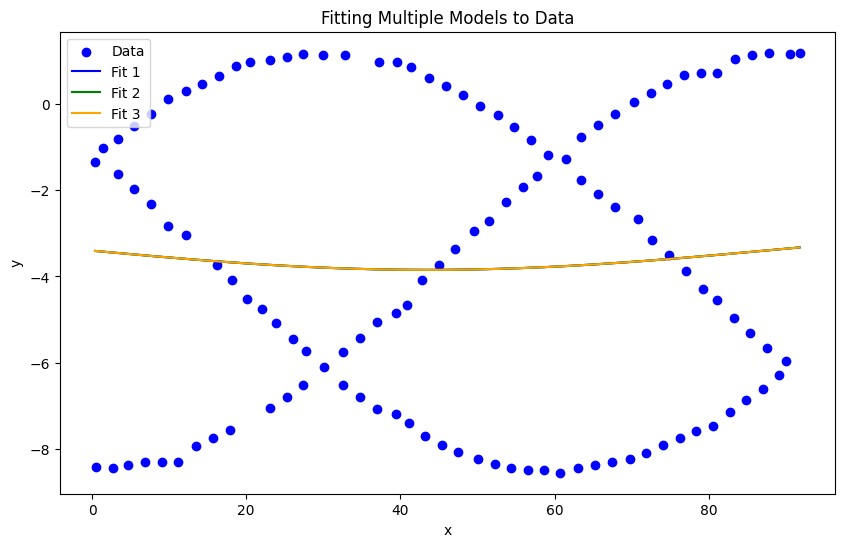

In [40]:
# モデル関数の定義
def model1(x, Kxx, Kyy, Kxy):
    C = np.cos(np.radians(x))
    S = np.sin(np.radians(x))
    return C * (C * Kxx + S * Kxy) + S * (C * Kxy + S * Kyy)

def model2(x, Kxx, Kyy, Kxy):
    C = np.cos(np.radians(x))
    S = np.sin(np.radians(x))
    return C * (-0.5 * Kxx * (-0.5 * C - 0.866025403784439 * S) - 0.5 * Kxy * (-0.866025403784439 * C - 0.5 * S) - 0.866025403784439 * Kxy * (-0.5 * C - 0.866025403784439 * S) - 0.866025403784439 * Kyy * (-0.866025403784439 * C - 0.5 * S)) + S * (-0.866025403784439 * Kxx * (-0.5 * C - 0.866025403784439 * S) - 0.866025403784439 * Kxy * (-0.866025403784439 * C - 0.5 * S) - 0.5 * Kxy * (-0.5 * C - 0.866025403784439 * S) - 0.5 * Kyy * (-0.866025403784439 * C - 0.5 * S))

def model3(x, Kxx, Kyy, Kxy):
    C = np.cos(np.radians(x))
    S = np.sin(np.radians(x))
    return C * (-0.5 * Kxx * (-0.5 * C + 0.866025403784439 * S) + 0.866025403784439 * Kxy * (-0.5 * C + 0.866025403784439 * S) - 0.5 * Kxy * (0.866025403784439 * C - 0.5 * S) + 0.866025403784439 * Kyy * (0.866025403784439 * C - 0.5 * S)) + S * (0.866025403784439 * Kxx * (-0.5 * C + 0.866025403784439 * S) - 0.5 * Kxy * (-0.5 * C + 0.866025403784439 * S) + 0.866025403784439 * Kxy * (0.866025403784439 * C - 0.5 * S) - 0.5 * Kyy * (0.866025403784439 * C - 0.5 * S))

# 初期推定値の設定
initial_guess1 = [1, 1, 1]  # model1 の初期値
initial_guess2 = [1, 1, 1]  # model2 の初期値
initial_guess3 = [1, 1, 1]  # model3 の初期値

# データにフィット
popt1, pcov1 = curve_fit(model1, x, y, p0=initial_guess1)
popt2, pcov2 = curve_fit(model2, x, y, p0=initial_guess2)
popt3, pcov3 = curve_fit(model3, x, y, p0=initial_guess3)

# フィッティング結果のプロット
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data', color='blue')

# フィッティング曲線のプロット
x_fit = np.linspace(min(x), max(x), 1000)
plt.plot(x_fit, model1(x_fit, *popt1), label=f'Fit 1', color='blue')
plt.plot(x_fit, model2(x_fit, *popt2), label=f'Fit 2', color='green')
plt.plot(x_fit, model3(x_fit, *popt3), label=f'Fit 3', color='orange')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Fitting Multiple Models to Data')
plt.show()

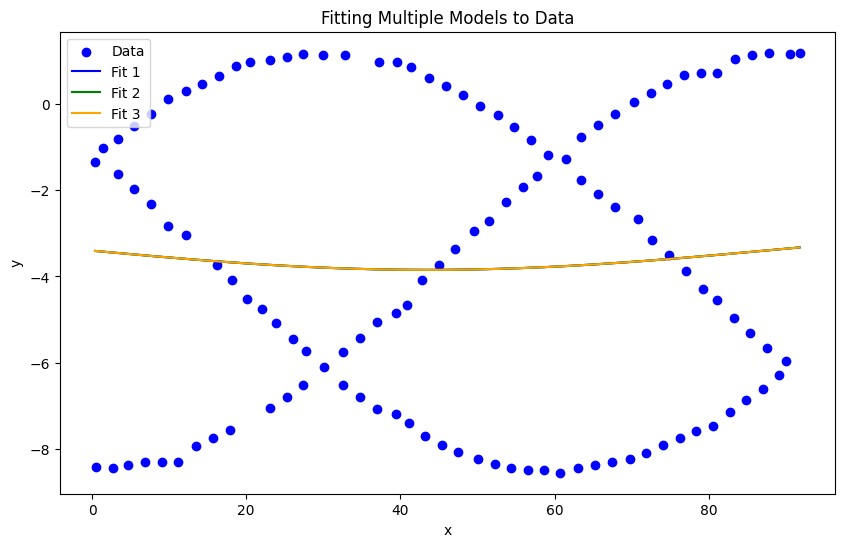

Fit 1 parameters: [-3.40373933 -3.35825732 -0.46706685]
Fit 2 parameters: [-11.86054287 -11.95150668   9.84385282]
Fit 3 parameters: [-15.09647848 -15.18744229 -13.58038931]


In [41]:
# モデル関数の定義
def model1(x, Kxx, Kyy, Kxy):
    C = np.cos(np.radians(x))
    S = np.sin(np.radians(x))
    return C*(C*Kxx + S*Kxy) + S*(C*Kxy + S*Kyy)

def model2(x, Kxx, Kyy, Kxy):
    C = np.cos(np.radians(x))
    S = np.sin(np.radians(x))
    return C*(-0.5*Kxx*(-0.5*C - 0.866025403784439*S) - 0.5*Kxy*(-0.866025403784439*C - 0.5*S) - 0.866025403784439*Kxy*(-0.5*C - 0.866025403784439*S) - 0.866025403784439*Kyy*(-0.866025403784439*C - 0.5*S)) + S*(-0.866025403784439*Kxx*(-0.5*C - 0.866025403784439*S) - 0.866025403784439*Kxy*(-0.866025403784439*C - 0.5*S) - 0.5*Kxy*(-0.5*C - 0.866025403784439*S) - 0.5*Kyy*(-0.866025403784439*C - 0.5*S))

def model3(x, Kxx, Kyy, Kxy):
    C = np.cos(np.radians(x))
    S = np.sin(np.radians(x))
    return C*(-0.5*Kxx*(-0.5*C + 0.866025403784439*S) + 0.866025403784439*Kxy*(-0.5*C + 0.866025403784439*S) - 0.5*Kxy*(0.866025403784439*C - 0.5*S) + 0.866025403784439*Kyy*(0.866025403784439*C - 0.5*S)) + S*(0.866025403784439*Kxx*(-0.5*C + 0.866025403784439*S) - 0.5*Kxy*(-0.5*C + 0.866025403784439*S) + 0.866025403784439*Kxy*(0.866025403784439*C - 0.5*S) - 0.5*Kyy*(0.866025403784439*C - 0.5*S))

# 初期推定値の設定
initial_guess = [1, 1, 1]

# モデルごとにデータをフィット
popt1, pcov1 = curve_fit(model1, x, y, p0=initial_guess)
popt2, pcov2 = curve_fit(model2, x, y, p0=initial_guess)
popt3, pcov3 = curve_fit(model3, x, y, p0=initial_guess)

# フィッティング結果のプロット
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data', color='blue')

# フィッティング曲線のプロット
x_fit = np.linspace(min(x), max(x), 1000)
plt.plot(x_fit, model1(x_fit, *popt1), label='Fit 1', color='blue')
plt.plot(x_fit, model2(x_fit, *popt2), label='Fit 2', color='green')
plt.plot(x_fit, model3(x_fit, *popt3), label='Fit 3', color='orange')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Fitting Multiple Models to Data')
plt.show()

# フィッティング結果の表示
print(f'Fit 1 parameters: {popt1}')
print(f'Fit 2 parameters: {popt2}')
print(f'Fit 3 parameters: {popt3}')